In [3]:
import pandas as pd
from county import counties, states, duplicates, uniques
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file = 'acs2017_county_data.csv'

df = pd.read_csv(file)

df.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [5]:
lime_df = df.loc[df["County"].isin(counties), :]
lime_df

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
6,1013,Alabama,Butler County,20126,9416,10710,0.3,52.2,44.7,0.1,...,0.9,0.9,2.0,23.2,7727,79.1,15.3,5.3,0.3,7.6
23,1047,Alabama,Dallas County,40755,18809,21946,1.0,27.7,70.2,0.0,...,1.7,1.4,1.2,22.1,14461,78.8,15.2,5.6,0.4,13.7
28,1057,Alabama,Fayette County,16657,8191,8466,1.7,85.0,11.5,0.0,...,1.3,0.5,2.4,27.9,6307,79.6,15.4,4.8,0.2,8.4
29,1059,Alabama,Franklin County,31507,15818,15689,16.3,77.7,4.7,0.2,...,0.2,2.7,1.9,28.4,12534,78.5,15.6,6.0,0.0,8.2
36,1073,Alabama,Jefferson County,659460,312333,347127,3.7,50.4,42.4,0.2,...,1.4,1.0,2.8,23.8,300739,81.8,13.5,4.5,0.2,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,55031,Wisconsin,Douglas County,43503,21734,21769,1.5,91.9,1.2,1.7,...,3.5,1.6,3.9,22.3,21594,82.3,13.4,4.2,0.2,5.6
3074,55055,Wisconsin,Jefferson County,84586,42282,42304,7.0,89.9,0.8,0.1,...,3.3,1.0,4.2,23.8,44955,83.6,11.3,5.0,0.1,4.3
3087,55079,Wisconsin,Milwaukee County,956586,462784,493802,14.6,52.2,26.1,0.5,...,3.6,1.6,3.4,22.4,454524,84.7,11.6,3.6,0.1,7.1
3088,55081,Wisconsin,Monroe County,45303,22893,22410,4.2,91.2,1.5,0.9,...,3.2,1.9,4.6,19.8,21433,72.4,20.3,7.0,0.3,4.7


In [6]:
add = []

for n in duplicates:
    temp_df = lime_df.loc[df["County"]==n[0], :]
    temp_df = temp_df.loc[df["State"]==n[1], :]
    add.append(temp_df)

In [7]:
for n in uniques:
    temp_df = lime_df.loc[df["County"]==n, :]
    add.append(temp_df)
clean_df = pd.concat(add)
clean_df

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1048,21111,Kentucky,Jefferson County,764378,369391,394987,5.0,68.5,21.0,0.1,...,2.0,1.7,3.9,22.2,376394,84.7,10.9,4.2,0.2,6.4
2067,39049,Ohio,Franklin County,1253507,611086,642421,5.2,64.5,21.7,0.1,...,2.5,1.5,4.4,21.8,650022,81.7,14.0,4.3,0.1,5.7
745,18097,Indiana,Marion County,939964,452538,487426,10.1,56.7,27.2,0.2,...,1.8,1.5,3.2,23.3,450798,85.8,9.9,4.1,0.1,8.0
749,18105,Indiana,Monroe County,144436,72005,72431,3.3,84.1,3.0,0.2,...,7.4,2.9,4.1,18.7,71839,74.1,20.3,5.6,0.0,6.3
1312,26163,Michigan,Wayne County,1763822,848339,915483,5.7,49.7,38.9,0.3,...,1.9,1.6,3.2,25.2,722115,86.7,9.5,3.7,0.1,11.6
1681,31055,Nebraska,Douglas County,549706,270917,278789,12.2,70.2,10.9,0.3,...,2.1,1.3,3.8,19.3,285735,85.8,10.1,4.1,0.1,4.4
2073,39061,Ohio,Hamilton County,808703,389496,419207,3.0,65.9,25.6,0.1,...,2.9,1.0,4.5,23.2,394387,85.2,10.2,4.5,0.1,7.0
367,12095,Florida,Orange County,1290216,633835,656381,30.2,41.6,19.9,0.1,...,1.2,2.1,5.3,27.6,642687,86.5,9.0,4.3,0.1,6.8
1026,21067,Kentucky,Fayette County,315109,154530,160579,7.0,71.8,14.3,0.2,...,3.8,1.9,4.4,20.9,162280,79.3,15.5,5.0,0.1,6.1
170,5119,Arkansas,Pulaski County,392848,188310,204538,6.0,53.2,35.9,0.2,...,1.3,1.3,3.4,20.3,182512,75.7,19.4,4.7,0.2,5.9


In [10]:
eths = ['Hispanic','White','Black', 'Asian']

In [28]:
pers = []

for e in eths:
    pers.append(clean_df[e].mean())
    
pers

[15.43, 58.62666666666666, 15.615000000000006, 6.565000000000001]

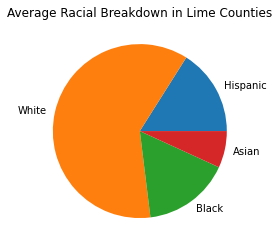

In [30]:
plt.pie(pers, labels = eths)
plt.title('Average Racial Breakdown in Lime Counties')
plt.savefig('Graphs/LimeBreakdown.png')
plt.show()

In [31]:
pers = []

for e in eths:
    pers.append(df[e].mean())
    
pers


[11.296583850931661, 74.9201863354037, 8.681956521739114, 1.2893788819875742]

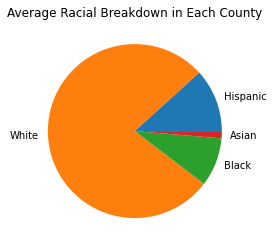

In [33]:
plt.pie(pers, labels = eths)
plt.title('Average Racial Breakdown in Each County')
plt.savefig('Graphs/USBreakdown.png')
plt.show()

In [34]:
jobs = ['PrivateWork','PublicWork','SelfEmployed','FamilyWork','Unemployment']

In [35]:
#All of US
for j in jobs:
    population = (df['TotalPop']*df[j]/100).sum()
    per = (population/df['TotalPop'].sum())
    print(f"The percentage of people who {j} is {per*100}%")

The percentage of people who PrivateWork is 79.7104863745829%
The percentage of people who PublicWork is 14.09942844523728%
The percentage of people who SelfEmployed is 6.022053019944288%
The percentage of people who FamilyWork is 0.16451263997412174%
The percentage of people who Unemployment is 6.760995463202418%


In [36]:
for j in jobs:
    population = (clean_df['TotalPop']*clean_df[j]/100).sum()
    per = (population/clean_df['TotalPop'].sum())
    print(f"The percentage of people who {j} is {per*100}%")

The percentage of people who PrivateWork is 81.85566814021051%
The percentage of people who PublicWork is 12.473470646764643%
The percentage of people who SelfEmployed is 5.529889651191346%
The percentage of people who FamilyWork is 0.130764847522429%
The percentage of people who Unemployment is 6.704405641786507%


In [82]:
#Total pop all of US
avg = df['TotalPop'].mean()
print(f'The average population of a US county is {int(avg)}')

The average population of a US county is 100768


In [74]:
avg_l = clean_df['TotalPop'].mean()
print(f'The average population of a Lime county is {int(avg_l)}')

The average population of a Lime county is 955210


In [39]:
df['TotalPop'].max()

10105722

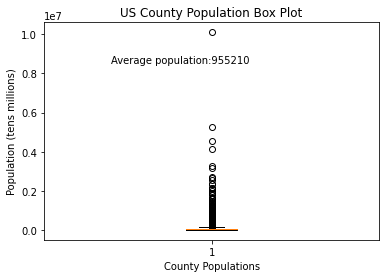

In [53]:
#For all counties
vals = df['TotalPop'].tolist()
plt.boxplot(vals)
plt.text(0.7, 8500000, f'Average population:{int(avg)}')
plt.title('US County Population Box Plot')
plt.xlabel('County Populations')
plt.ylabel('Population (tens millions)')
plt.show()

In [56]:
nums = [.25,.5,.75]
all_quarts = []
for n in nums:
    all_quarts.append(np.quantile(vals, n))
all_quarts

[11213.5, 25847.5, 66608.25]

In [57]:
for x in all_quarts:
    print(x/10000000)

0.00112135
0.00258475
0.006660825


In [79]:
iqr = all_quarts[2]- all_quarts[0]

upper = all_quarts[2]+(1.5*iqr)
lower = all_quarts[0]-(1.5*iqr)
print(f'The US lower bound is {lower}')
print(f'The US upper bound is {upper}')

The US lower bound is -71878.625
The US upper bound is 149700.375


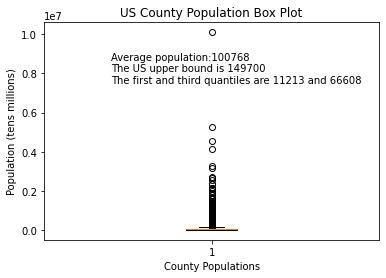

In [86]:
#For all counties
vals = df['TotalPop'].tolist()
plt.boxplot(vals)
plt.text(0.7, 7500000, f'Average population:{int(avg)}\nThe US upper bound is {int(upper)}\nThe first and third quantiles are {int(all_quarts[0])} and {int(all_quarts[2])}')
plt.title('US County Population Box Plot')
#plt.text(0,7, 1000000, 'The US lower bound is -71878')
plt.xlabel('County Populations')
plt.ylabel('Population (tens millions)')
plt.savefig('Graphs/USBoxplot')
plt.show()

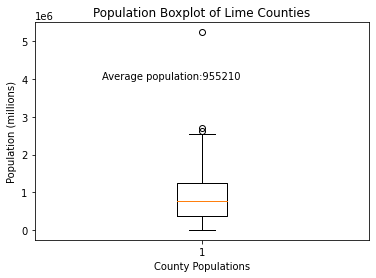

In [77]:
#For lime counties
values = clean_df['TotalPop'].tolist()
plt.boxplot(values)

plt.text(0.7, 7500000, f'Average population:{int(avg)}\nThe US upper bound is {int(upper)}\nThe first and third quantiles are {int(all_quarts[0])} and {int(all_quarts[2])}')


plt.title('Population Boxplot of Lime Counties')
plt.text(0.7, 4000000, f'Average population:{int(avg_l)}')
plt.xlabel('County Populations')
plt.ylabel('Population (millions)')
plt.savefig('Graphs/LimeBoxplot')
plt.show()

In [87]:
lime_quarts = []
for n in nums:
    lime_quarts.append(np.quantile(values, n))
lime_quarts

[388561.5, 769290.5, 1254480.5]

In [88]:
iqr_lime = lime_quarts[2] -lime_quarts[0]

lime_upper = lime_quarts[2]+(1.5*iqr_lime)
lime_lower = lime_quarts[0]-(1.5*iqr_lime)
print(f'The lime lower bound is {lime_lower}')
print(f'The lime upper bound is {lime_upper}')

The lime lower bound is -910317.0
The lime upper bound is 2553359.0


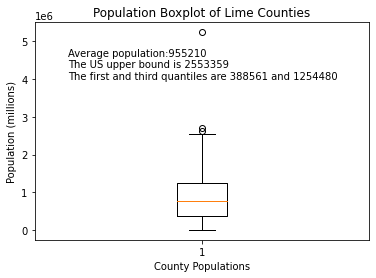

In [92]:
values = clean_df['TotalPop'].tolist()
plt.boxplot(values)

plt.title('Population Boxplot of Lime Counties')
plt.text(0.6, 4000000, f'Average population:{int(avg_l)}\nThe US upper bound is {int(lime_upper)}\nThe first and third quantiles are {int(lime_quarts[0])} and {int(lime_quarts[2])}')
plt.xlabel('County Populations')
plt.ylabel('Population (millions)')
plt.savefig('Graphs/LimeBoxplot')
plt.show()

In [93]:
#investigating counties with populations above 2.5 million
test_df = df.loc[df["TotalPop"]> 2500000, :]
print(len(test_df))
test_df

9


,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
103,4013,Arizona,Maricopa County,4155501,2055464,2100037,30.6,56.3,5.1,1.5,...,1.5,2.5,6.4,25.8,1929015,82.8,11.1,5.9,0.1,6.0
204,6037,California,Los Angeles County,10105722,4979641,5126081,48.4,26.5,7.9,0.2,...,2.7,2.3,5.3,30.9,4805817,79.3,11.2,9.3,0.2,7.8
215,6059,California,Orange County,3155816,1558245,1597571,34.2,41.4,1.6,0.2,...,1.9,2.0,5.6,27.4,1560997,82.0,10.1,7.7,0.2,5.8
222,6073,California,San Diego County,3283665,1651147,1632518,33.4,46.2,4.7,0.4,...,2.9,2.2,7.0,25.7,1536073,77.8,14.2,7.8,0.2,7.1
362,12086,Florida,Miami-Dade County,2702602,1311997,1390605,67.5,13.7,16.3,0.1,...,2.1,2.0,4.9,31.3,1272735,82.4,9.6,7.8,0.2,7.4
610,17031,Illinois,Cook County,5238541,2540704,2697837,25.1,42.7,23.4,0.1,...,4.4,2.4,4.5,32.9,2521437,84.2,11.1,4.6,0.1,8.7
1851,36047,New York,Kings County,2635121,1247773,1387348,19.3,36.0,30.6,0.1,...,8.6,2.7,4.3,42.4,1217976,79.4,13.9,6.6,0.1,8.1
2579,48113,Texas,Dallas County,2552213,1257751,1294462,39.6,30.2,22.1,0.2,...,1.5,2.0,4.3,27.2,1252101,84.3,9.1,6.4,0.2,5.9
2623,48201,Texas,Harris County,4525519,2251060,2274459,42.2,30.6,18.5,0.2,...,1.5,1.9,3.7,28.9,2180392,83.4,9.8,6.6,0.2,6.4


In [94]:
test_lime_df = clean_df.loc[clean_df["TotalPop"]> 2500000, :]
print(len(test_lime_df))
test_lime_df

4


,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
610,17031,Illinois,Cook County,5238541,2540704,2697837,25.1,42.7,23.4,0.1,...,4.4,2.4,4.5,32.9,2521437,84.2,11.1,4.6,0.1,8.7
2579,48113,Texas,Dallas County,2552213,1257751,1294462,39.6,30.2,22.1,0.2,...,1.5,2.0,4.3,27.2,1252101,84.3,9.1,6.4,0.2,5.9
1851,36047,New York,Kings County,2635121,1247773,1387348,19.3,36.0,30.6,0.1,...,8.6,2.7,4.3,42.4,1217976,79.4,13.9,6.6,0.1,8.1
362,12086,Florida,Miami-Dade County,2702602,1311997,1390605,67.5,13.7,16.3,0.1,...,2.1,2.0,4.9,31.3,1272735,82.4,9.6,7.8,0.2,7.4


In [95]:
#investigating counties with populations above 1.25 million
test_df = df.loc[df["TotalPop"]> 1250000, :]
print(len(test_df))
test_df

32


,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
103,4013,Arizona,Maricopa County,4155501,2055464,2100037,30.6,56.3,5.1,1.5,...,1.5,2.5,6.4,25.8,1929015,82.8,11.1,5.9,0.1,6.0
186,6001,California,Alameda County,1629615,799649,829966,22.5,32.2,10.7,0.3,...,3.7,3.6,6.0,32.5,826310,79.3,13.2,7.3,0.1,6.0
204,6037,California,Los Angeles County,10105722,4979641,5126081,48.4,26.5,7.9,0.2,...,2.7,2.3,5.3,30.9,4805817,79.3,11.2,9.3,0.2,7.8
215,6059,California,Orange County,3155816,1558245,1597571,34.2,41.4,1.6,0.2,...,1.9,2.0,5.6,27.4,1560997,82.0,10.1,7.7,0.2,5.8
218,6065,California,Riverside County,2355002,1171711,1183291,48.0,36.6,6.0,0.4,...,1.6,1.7,5.2,33.1,978726,77.7,14.7,7.5,0.2,9.9
219,6067,California,Sacramento County,1495400,730680,764720,22.8,45.7,9.5,0.4,...,1.9,2.4,5.5,26.9,666790,71.5,21.3,6.9,0.2,8.8
221,6071,California,San Bernardino County,2121220,1055170,1066050,52.3,29.8,8.0,0.3,...,1.7,1.2,4.7,30.9,869658,77.3,16.2,6.4,0.1,9.9
222,6073,California,San Diego County,3283665,1651147,1632518,33.4,46.2,4.7,0.4,...,2.9,2.2,7.0,25.7,1536073,77.8,14.2,7.8,0.2,7.1
228,6085,California,Santa Clara County,1911226,963317,947909,26.1,32.6,2.4,0.2,...,2.1,3.1,4.8,28.0,967294,84.7,9.3,5.9,0.1,5.7
325,12011,Florida,Broward County,1890416,920265,970151,28.4,38.2,27.4,0.2,...,1.2,2.1,4.9,28.2,930561,83.1,10.6,6.2,0.1,7.6


In [96]:
test_lime_df = clean_df.loc[clean_df["TotalPop"]> 1250000, :]
print(len(test_lime_df))
test_lime_df

16


,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2067,39049,Ohio,Franklin County,1253507,611086,642421,5.2,64.5,21.7,0.1,...,2.5,1.5,4.4,21.8,650022,81.7,14.0,4.3,0.1,5.7
1312,26163,Michigan,Wayne County,1763822,848339,915483,5.7,49.7,38.9,0.3,...,1.9,1.6,3.2,25.2,722115,86.7,9.5,3.7,0.1,11.6
367,12095,Florida,Orange County,1290216,633835,656381,30.2,41.6,19.9,0.1,...,1.2,2.1,5.3,27.6,642687,86.5,9.0,4.3,0.1,6.8
610,17031,Illinois,Cook County,5238541,2540704,2697837,25.1,42.7,23.4,0.1,...,4.4,2.4,4.5,32.9,2521437,84.2,11.1,4.6,0.1,8.7
2579,48113,Texas,Dallas County,2552213,1257751,1294462,39.6,30.2,22.1,0.2,...,1.5,2.0,4.3,27.2,1252101,84.3,9.1,6.4,0.2,5.9
2969,53033,Washington,King County,2118119,1058695,1059424,9.5,61.4,6.0,0.5,...,5.1,2.7,6.5,29.1,1140353,82.0,12.0,5.8,0.2,5.0
1851,36047,New York,Kings County,2635121,1247773,1387348,19.3,36.0,30.6,0.1,...,8.6,2.7,4.3,42.4,1217976,79.4,13.9,6.6,0.1,8.1
219,6067,California,Sacramento County,1495400,730680,764720,22.8,45.7,9.5,0.4,...,1.9,2.4,5.5,26.9,666790,71.5,21.3,6.9,0.2,8.8
228,6085,California,Santa Clara County,1911226,963317,947909,26.1,32.6,2.4,0.2,...,2.1,3.1,4.8,28.0,967294,84.7,9.3,5.9,0.1,5.7
2060,39035,Ohio,Cuyahoga County,1257401,599033,658368,5.6,59.7,29.3,0.1,...,2.7,1.2,4.0,24.3,587730,83.7,12.1,4.1,0.1,8.9


In [97]:
#Population growth from 2015
file_2015 = 'acs2015_county_data.csv'

df_15 = pd.read_csv(file_2015)

In [98]:
df_15 = df_15.iloc[:, [1,2,3]]
df_15

df_short = df.iloc[:, [1,2,3]]
df_short

,State,County,TotalPop
0,Alabama,Autauga County,55036
1,Alabama,Baldwin County,203360
2,Alabama,Barbour County,26201
3,Alabama,Bibb County,22580
4,Alabama,Blount County,57667
...,...,...,...
3215,Puerto Rico,Vega Baja Municipio,54754
3216,Puerto Rico,Vieques Municipio,8931
3217,Puerto Rico,Villalba Municipio,23659
3218,Puerto Rico,Yabucoa Municipio,35025


In [99]:
df_short['TotalPop_15'] = df_15['TotalPop']

<ipython-input-99-16d67c88c488>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['TotalPop_15'] = df_15['TotalPop']


In [100]:
df_short.columns = ['State','County','TotalPop_17','TotalPop_15']

df_short

,State,County,TotalPop_17,TotalPop_15
0,Alabama,Autauga County,55036,55221
1,Alabama,Baldwin County,203360,195121
2,Alabama,Barbour County,26201,26932
3,Alabama,Bibb County,22580,22604
4,Alabama,Blount County,57667,57710
...,...,...,...,...
3215,Puerto Rico,Vega Baja Municipio,54754,56858
3216,Puerto Rico,Vieques Municipio,8931,9130
3217,Puerto Rico,Villalba Municipio,23659,24685
3218,Puerto Rico,Yabucoa Municipio,35025,36279


In [101]:
df_short['PopChange'] = df_short['TotalPop_17'] -df_short['TotalPop_15']
df_short

<ipython-input-101-ff879c2afbcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['PopChange'] = df_short['TotalPop_17'] -df_short['TotalPop_15']


,State,County,TotalPop_17,TotalPop_15,PopChange
0,Alabama,Autauga County,55036,55221,-185
1,Alabama,Baldwin County,203360,195121,8239
2,Alabama,Barbour County,26201,26932,-731
3,Alabama,Bibb County,22580,22604,-24
4,Alabama,Blount County,57667,57710,-43
...,...,...,...,...,...
3215,Puerto Rico,Vega Baja Municipio,54754,56858,-2104
3216,Puerto Rico,Vieques Municipio,8931,9130,-199
3217,Puerto Rico,Villalba Municipio,23659,24685,-1026
3218,Puerto Rico,Yabucoa Municipio,35025,36279,-1254


In [102]:
lime_df = df_short.loc[df_short["County"].isin(counties), :]
lime_df

,State,County,TotalPop_17,TotalPop_15,PopChange
6,Alabama,Butler County,20126,20354,-228
23,Alabama,Dallas County,40755,42154,-1399
28,Alabama,Fayette County,16657,16896,-239
29,Alabama,Franklin County,31507,31634,-127
36,Alabama,Jefferson County,659460,659026,434
...,...,...,...,...,...
3062,Wisconsin,Douglas County,43503,43799,-296
3074,Wisconsin,Jefferson County,84586,84345,241
3087,Wisconsin,Milwaukee County,956586,955939,647
3088,Wisconsin,Monroe County,45303,45274,29


In [103]:
add = []

for n in duplicates:
    temp_df = lime_df.loc[lime_df["County"]==n[0], :]
    temp_df = temp_df.loc[temp_df["State"]==n[1], :]
    add.append(temp_df)

In [104]:
for n in uniques:
    temp_df = lime_df.loc[lime_df["County"]==n, :]
    add.append(temp_df)
clean_df = pd.concat(add)
clean_df

,State,County,TotalPop_17,TotalPop_15,PopChange
1048,Kentucky,Jefferson County,764378,755809,8569
2067,Ohio,Franklin County,1253507,1215761,37746
745,Indiana,Marion County,939964,926335,13629
749,Indiana,Monroe County,144436,142404,2032
1312,Michigan,Wayne County,1763822,1778969,-15147
1681,Nebraska,Douglas County,549706,537655,12051
2073,Ohio,Hamilton County,808703,804194,4509
367,Florida,Orange County,1290216,1229039,61177
1026,Kentucky,Fayette County,315109,308306,6803
170,Arkansas,Pulaski County,392848,390463,2385


In [105]:
#Lime counties average population change in 2 years
clean_df['PopChange'].mean()

18414.666666666668

In [106]:
#All counties average population change in 2 years
df_short['PopChange'].mean()

1358.7813664596274

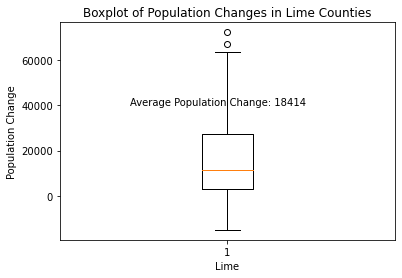

In [119]:
values = clean_df['PopChange'].tolist()
yes = clean_df['PopChange'].mean()
plt.boxplot(values)
plt.xlabel('Lime')
plt.text(0.71, 40000, f'Average Population Change: {int(yes)}')
plt.ylabel('Population Change')
plt.title('Boxplot of Population Changes in Lime Counties')
plt.savefig('Graphs/LimePopChange.png')
plt.show()

In [36]:
lime_quarts = []
for n in nums:
    lime_quarts.append(np.quantile(values, n))
lime_quarts

[2885.25, 11265.0, 27443.5]

In [37]:
iqr = lime_quarts[2]- lime_quarts[0]

upper = lime_quarts[2]+(1.5*iqr)
lower = lime_quarts[0]-(1.5*iqr)
print(f'The US lower bound is {lower}')
print(f'The US upper bound is {upper}')

The US lower bound is -33952.125
The US upper bound is 64280.875


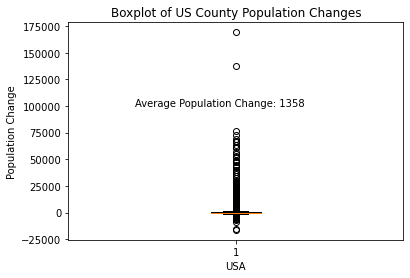

In [115]:
values = df_short['PopChange'].tolist()
av = df_short['PopChange'].mean()
plt.boxplot(values)
plt.text(0.7, 100000, f'Average Population Change: {int(av)}')
plt.ylabel('Population Change')
plt.xlabel('USA')
plt.title('Boxplot of US County Population Changes')
plt.savefig('Graphs/USPopChange.png')
plt.show()

In [39]:
quarts = []
for n in nums:
    quarts.append(np.quantile(values, n))
quarts

[-207.25, -39.5, 319.25]

In [45]:
iqr = quarts[2]- quarts[0]

upper = quarts[2]+(1.5*iqr)
lower = quarts[0]-(1.5*iqr)
print(f'The US lower bound is {lower}')
print(f'The US upper bound is {upper}')

The US lower bound is -997.0
The US upper bound is 1109.0


In [51]:
df_short['ChgPer'] = df_short['PopChange']/df_short['TotalPop_17']*100
df_short

<ipython-input-51-9f022a28285b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['ChgPer'] = df_short['PopChange']/df_short['TotalPop_17']*100


,State,County,TotalPop_17,TotalPop_15,PopChange,ChgPer
0,Alabama,Autauga County,55036,55221,-185,-0.336144
1,Alabama,Baldwin County,203360,195121,8239,4.051436
2,Alabama,Barbour County,26201,26932,-731,-2.789970
3,Alabama,Bibb County,22580,22604,-24,-0.106289
4,Alabama,Blount County,57667,57710,-43,-0.074566
...,...,...,...,...,...,...
3215,Puerto Rico,Vega Baja Municipio,54754,56858,-2104,-3.842642
3216,Puerto Rico,Vieques Municipio,8931,9130,-199,-2.228194
3217,Puerto Rico,Villalba Municipio,23659,24685,-1026,-4.336616
3218,Puerto Rico,Yabucoa Municipio,35025,36279,-1254,-3.580300


In [52]:
df_short['ChgPer'].mean()

-0.11401015363289445

In [53]:
clean_df['ChgPer'] =clean_df['PopChange']/clean_df['TotalPop_17']*100
clean_df

,State,County,TotalPop_17,TotalPop_15,PopChange,ChgPer
1048,Kentucky,Jefferson County,764378,755809,8569,1.121042
2067,Ohio,Franklin County,1253507,1215761,37746,3.011232
745,Indiana,Marion County,939964,926335,13629,1.449949
749,Indiana,Monroe County,144436,142404,2032,1.406851
1312,Michigan,Wayne County,1763822,1778969,-15147,-0.858760
1681,Nebraska,Douglas County,549706,537655,12051,2.192263
2073,Ohio,Hamilton County,808703,804194,4509,0.557559
367,Florida,Orange County,1290216,1229039,61177,4.741609
1026,Kentucky,Fayette County,315109,308306,6803,2.158935
170,Arkansas,Pulaski County,392848,390463,2385,0.607105


In [54]:
clean_df['ChgPer'].mean()

1.9509825244660386

In [57]:
drop_df = pd.concat([clean_df, df_short]).drop_duplicates(keep=False)

In [58]:
test_df = drop_df.loc[drop_df["PopChange"]> 27000, :]

In [60]:
#potential new places based on population change
test_df

,State,County,TotalPop_17,TotalPop_15,PopChange,ChgPer
103,Arizona,Maricopa County,4155501,4018143,137358,3.305450
192,California,Contra Costa County,1123678,1096068,27610,2.457110
204,California,Los Angeles County,10105722,10038388,67334,0.666296
215,California,Orange County,3155816,3116069,39747,1.259484
218,California,Riverside County,2355002,2298032,56970,2.419106
222,California,San Diego County,3283665,3223096,60569,1.844555
325,Florida,Broward County,1890416,1843152,47264,2.500190
354,Florida,Lee County,700165,663675,36490,5.211629
369,Florida,Palm Beach County,1426772,1378806,47966,3.361855
453,Georgia,Gwinnett County,889954,859234,30720,3.451864


In [67]:
#areas where percentage change is greater than 2%
test2_df = drop_df.loc[drop_df["ChgPer"]> 4, :]
test2_df

,State,County,TotalPop_17,TotalPop_15,PopChange,ChgPer
1,Alabama,Baldwin County,203360,195121,8239,4.051436
72,Alaska,Denali Borough,2303,2060,243,10.551455
83,Alaska,Matanuska-Susitna Borough,101135,96178,4957,4.901369
94,Alaska,Yakutat City and Borough,682,643,39,5.718475
114,Arkansas,Benton County,251823,238198,13625,5.410546
...,...,...,...,...,...,...
2802,Utah,Wasatch County,29306,26661,2645,9.025456
2803,Utah,Washington County,155577,148244,7333,4.713422
2872,Virginia,Loudoun County,374558,351129,23429,6.255106
2881,Virginia,New Kent County,20523,19560,963,4.692296


In [68]:
test2_df = test2_df.loc[test2_df["TotalPop_17"]> 100000, :]
test2_df

,State,County,TotalPop_17,TotalPop_15,PopChange,ChgPer
1,Alabama,Baldwin County,203360,195121,8239,4.051436
83,Alaska,Matanuska-Susitna Borough,101135,96178,4957,4.901369
114,Arkansas,Benton County,251823,238198,13625,5.410546
262,Colorado,Douglas County,320940,306974,13966,4.351592
306,Colorado,Weld County,285729,270948,14781,5.173084
327,Florida,Charlotte County,173236,165783,7453,4.302224
330,Florida,Collier County,356774,341091,15683,4.395780
336,Florida,Flagler County,105015,100783,4232,4.029900
353,Florida,Lake County,326215,310561,15654,4.798676
354,Florida,Lee County,700165,663675,36490,5.211629


In [66]:
clean_df['ChgPer'].max()

4.741609156916361